Inicialização

In [21]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('full_bus_df.csv', low_memory=False)

In [23]:
le = LabelEncoder()

In [24]:
df = pd.read_csv("full_bus_df.csv", low_memory=False)

In [25]:
df

,Linha,CodLinhaConsFênix,NomeLinha,TipoTransporte,InícioOperação,DataIni,HoraIni,DataFim,HoraFim,Sentido,NoVeículo,DuraçãoViagem,TotalGiros,KmPerc
0,100,100,Madrugadão Centro - UFSC,Regular,2003-08-03,2019-01-31,08:01:00,2019-01-31,08:03:00,Volta,4409,00:02:00,0,16.30
1,100,100,Madrugadão Centro - UFSC,Regular,2003-08-03,2019-02-01,00:46:00,2019-02-01,01:28:00,Volta,0225,00:42:00,6,16.30
2,100,100,Madrugadão Centro - UFSC,Regular,2003-08-03,2019-02-01,01:28:00,2019-02-01,02:30:00,Volta,0225,01:02:00,14,16.30
3,100,100,Madrugadão Centro - UFSC,Regular,2003-08-03,2019-02-01,02:30:00,2019-02-01,03:28:00,Volta,0225,00:58:00,11,16.30
4,100,100,Madrugadão Centro - UFSC,Regular,2003-08-03,2019-02-01,03:28:00,2019-02-01,04:15:00,Volta,0225,00:47:00,0,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057500,M250V,V-250,Forte/Canasvieiras,Regular,2018-07-23,2018-12-04,06:41:00,2018-12-04,07:21:00,Volta,1525,00:40:00,9,12.35
2057501,M250V,V-250,Forte/Canasvieiras,Regular,2018-07-23,2018-12-04,07:25:00,2018-12-04,07:56:00,Volta,1467,00:31:00,10,12.35
2057502,M250V,V-250,Forte/Canasvieiras,Regular,2018-07-23,2018-12-03,06:45:00,2018-12-03,07:22:00,Volta,11617,00:37:00,12,12.35
2057503,M250V,V-250,Forte/Canasvieiras,Regular,2018-07-23,2018-12-03,07:25:00,2018-12-03,08:01:00,Volta,1467,00:36:00,19,12.35


In [5]:
df['DataIni'] = pd.to_datetime(df['DataIni'])
df['HoraIni'] = pd.to_datetime(df['HoraIni']).dt.time

df['DataHoraIni'] = pd.to_datetime(df['DataIni'].astype(str) + ' ' + df['HoraIni'].astype(str))

df['DiaDaSemana'] = df['DataHoraIni'].dt.day_name(locale='pt_BR.utf8')

def get_part_of_day(hour):
    if (hour > 4) and (hour <= 8):
        return "Manhã"
    elif (hour > 8) and (hour <= 12 ):
        return "Final da Manhã"
    elif (hour > 12) and (hour <= 16):
        return "Tarde"
    elif (hour > 16) and (hour <= 20) :
        return "Final da Tarde"
    elif (hour > 20) and (hour <= 24):
        return "Noite"
    elif (hour <= 4):
        return "Madrugada"

# Adicionar a coluna 'HoraDia', que indica a hora do dia
df['HorarioDia'] = df['DataHoraIni'].dt.hour.apply(get_part_of_day)

C:\Users\eddar\AppData\Local\Temp\ipykernel_12584\707555294.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HoraIni'] = pd.to_datetime(df['HoraIni']).dt.time


In [6]:
le = LabelEncoder()
df["DiaDaSemana"] = le.fit_transform(df["DiaDaSemana"])
df["HorarioDia"] = le.fit_transform(df["HorarioDia"])
df["DataHoraIni"] = le.fit_transform(df["DataHoraIni"])
df["Sentido"] = le.fit_transform(df["Sentido"])
df["Linha"] = le.fit_transform(df["Linha"])

df["DuraçãoViagem"] = pd.to_timedelta(df["DuraçãoViagem"])
df["TempoViagemMinutos"] = df["DuraçãoViagem"].dt.total_seconds() / 60
df.drop("DuraçãoViagem", axis=1, inplace=True)
df = df[['DiaDaSemana', 'HorarioDia', 'DataHoraIni', 'Sentido', 'Linha', 'TempoViagemMinutos', 'TotalGiros']]

In [7]:
display(df)

,DiaDaSemana,HorarioDia,DataHoraIni,Sentido,Linha,TempoViagemMinutos,TotalGiros
0,2,3,106415,1,0,2.0,0
1,4,2,107402,1,0,42.0,6
2,4,2,107413,1,0,62.0,14
3,4,2,107420,1,0,58.0,11
4,4,2,107424,1,0,47.0,0
...,...,...,...,...,...,...,...
2057500,6,3,38493,1,220,40.0,9
2057501,6,3,38537,1,220,31.0,10
2057502,3,3,37296,1,220,37.0,12
2057503,3,3,37336,1,220,36.0,19


In [8]:
sample_df = df.sample(frac=0.02, random_state=42)

In [9]:
display(sample_df)

,DiaDaSemana,HorarioDia,DataHoraIni,Sentido,Linha,TempoViagemMinutos,TotalGiros
629140,4,3,295556,0,66,38.0,0
577565,6,5,260638,1,62,30.0,12
538192,0,5,241741,1,59,43.0,2
1337352,4,1,149512,0,130,38.0,12
1168948,0,0,60980,1,117,26.0,0
...,...,...,...,...,...,...,...
910456,1,1,253812,0,86,23.0,12
557662,2,4,123802,1,61,29.0,7
463890,2,3,401751,0,52,17.0,9
460336,1,3,301357,1,52,16.0,5


In [11]:
X = sample_df.drop("TotalGiros", axis=1)
y = sample_df["TotalGiros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [26]:
models = [
    RandomForestRegressor(),
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=100000)
]

model_names = []
rmse_values = []
r2_values = []
mae_values = []

for m in models:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calcular métricas
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Salva métricas
    model_names.append(model.__class__.__name__)
    rmse_values.append(rmse)
    r2_values.append(r2)
    mae_values.append(mae)

    print(model.__class__.__name__)
    print("RMSE:", rmse)
    print("R²:", r2)
    print("MAE:", mae)

RandomForestRegressor
RMSE: 5.418461354553504
R²: 0.6038676272262659
MAE: 3.917010935601458
LinearRegression
RMSE: 7.777058712268742
R²: 0.18394556365475956
MAE: 6.156777353772393
Ridge
RMSE: 7.777063054323295
R²: 0.1839446524223769
MAE: 6.156789064772368
Lasso
RMSE: 8.060570786609917
R²: 0.12336265599249319
MAE: 6.486006255355691
ElasticNet
RMSE: 7.985121913011533
R²: 0.1396969213181365
MAE: 6.409881253326463
DecisionTreeRegressor
RMSE: 7.4355881299596005
R²: 0.2540340132710034
MAE: 5.086269744835966
GradientBoostingRegressor
RMSE: 6.297401363123867
R²: 0.4649293586176836
MAE: 4.924565428600072
SVR
RMSE: 8.993612193760821
R²: -0.09133149394364692
MAE: 7.092985998167486
KNeighborsRegressor
RMSE: 8.924824417712586
R²: -0.07470120640922695
MAE: 7.1946537059538285
MLPRegressor
RMSE: 23.239630965832784
R²: -6.286967450050545
MAE: 19.98378760347592


In [15]:
def plotGca (model_n, model_v, model_type = "RMSE"):
  plt.figure(figsize=(10, 6))
  plt.barh(model_n, model_v, color='skyblue')
  plt.xlabel(model_type)
  plt.title('Desempenho dos Modelos de Regressão')
  plt.gca().invert_yaxis()
  plt.show()

In [16]:
model_results = pd.DataFrame([model_names, rmse_values, r2_values, mae_values],
                  index=['Modelo', 'RMSE', 'R2', 'MAE']).T

In [17]:
print(model_results)

                      Modelo       RMSE        R2        MAE
0      RandomForestRegressor   5.450664  0.599145   3.957412
1           LinearRegression   7.777059  0.183946   6.156777
2                      Ridge   7.777063  0.183945   6.156789
3                      Lasso   8.060571  0.123363   6.486006
4                 ElasticNet   7.985122  0.139697   6.409881
5      DecisionTreeRegressor   7.509734  0.239083   5.144593
6  GradientBoostingRegressor   6.297401  0.464929   4.924565
7                        SVR   8.993612 -0.091331   7.092986
8        KNeighborsRegressor   8.924824 -0.074701   7.194654
9               MLPRegressor  13.829174 -1.580363  11.724951


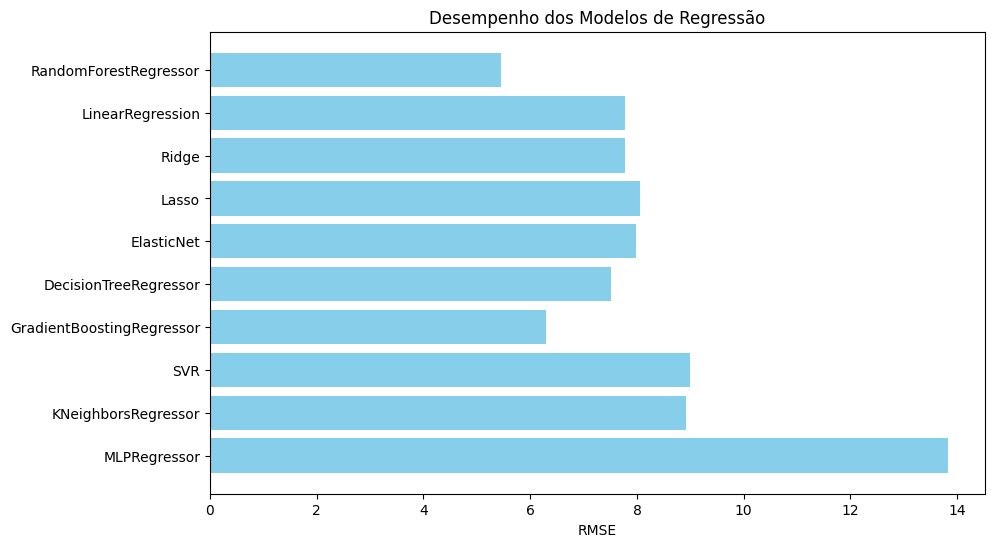

In [18]:
plotGca(model_v = rmse_values, model_n = model_names)

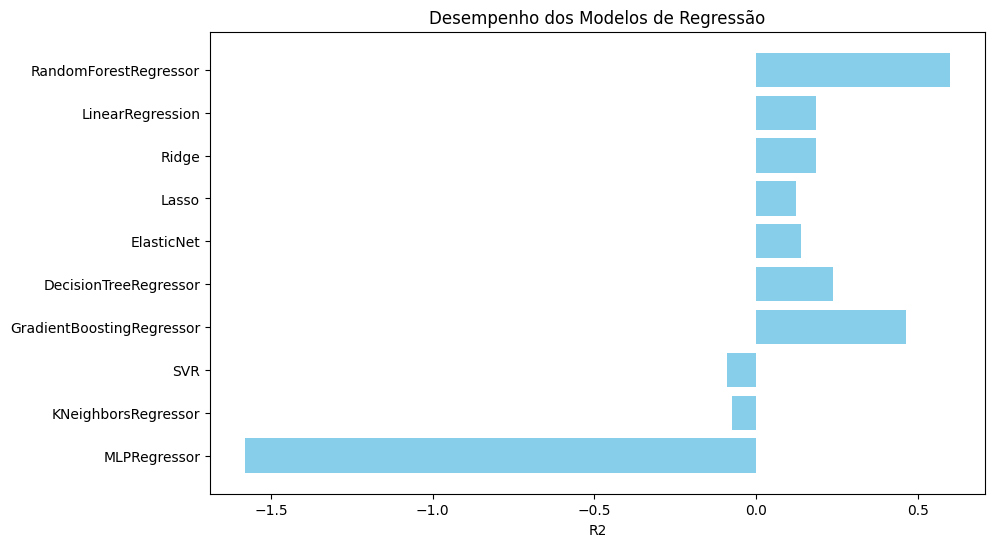

In [19]:
plotGca(model_names, r2_values, "R2")

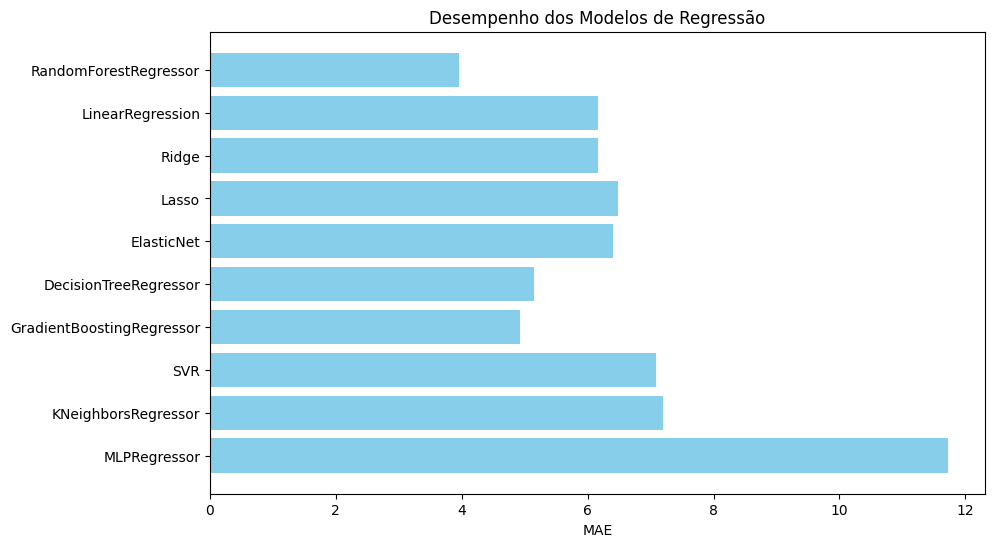

In [20]:
plotGca(model_names, mae_values,"MAE")